### Travel.com

"Travel.com" company wants to enable and establish a viable business model to expand its customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, the company is offering 5 types of packages - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the last year's data, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

### Dataset

The dataset used for this project contains the following variables:

Travel.csv dataset (4888)

https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

CustomerID: Unique customer ID
ProdTaken: Taken product: 1/0 (Target)
Age: The age of the customer
TypeofContact: How the customer was contacted (Company invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
DurationOfPitch: Duration of the pitch by a salesperson to the customer. (minute)
Occupation: Occupation of the customer.
Gender: Gender of the customer.
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer.
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch.
ProductPitched: Product pitched by the salesperson.
PreferredPropertyStar: Preferred hotel property rating by customer.
MaritalStatus: Marital status of the customer.
NumberOfTrips: Average number of trips in a year by customer.
Passport: The customer has a passport or not (0: No, 1: Yes).
PitchSatisfactionScore: Sales pitch satisfaction score.
OwnCar: Whether the customers own a car or not (0: No, 1: Yes).
NumberOfChildrenVisiting: Total number of children age less than 5 planning to take the trip with the customer.
Designation: Designation of the customer in the current organization.
MonthlyIncome: Gross monthly income of the customer.

### Model Building
The Random Forest model employed in this project utilizes random split hyperparameters, which create an ensemble of decision trees trained on diverse subsets of the training data.

Evaluation of the model's performance is done using key metrics such as AUC-ROC, a widely-used measure that assesses the classifier's ability to distinguish between classes. The confusion matrix provides a comprehensive breakdown of the model's predictions, enabling a detailed analysis of true positives, true negatives, false positives, and false negatives. Classification reports offer a concise summary of precision, recall, F1 score, and support for each class.

Additionally, the model provides insights into feature importance, facilitating feature selection, and understanding of the factors driving predictions. For further analysis, a single decision tree can be visualized to comprehend the underlying decision-making process.

In [104]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
from plotly import express as px
from matplotlib import pyplot as plt

%matplotlib inline

warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### **FEATURE ENGINEERING**

In [25]:
## Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### **DATA CLEANING**
1. Handling Missing Values
2. Handling Duplicates
3. Check Datatype
4. Understand the dataset
5. Spelling mistakes

In [26]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [27]:
df["TypeofContact"].value_counts()
 
# 

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [28]:

df["Occupation"].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [29]:
df["ProductPitched"].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [30]:
df["Designation"].value_counts()



Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [31]:



df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [32]:
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [106]:
df["Gender"]=df["Gender"].replace("Fe Male", "Female")
df["MaritalStatus"]=df["MaritalStatus"].replace("Single", "Unmarried")

In [107]:
df["Gender"].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [35]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [108]:
### Checking Null values

features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feat in features_with_na:
    print(f"{feat} has {np.round(df[feat].isnull().mean()*100,2)}% NULL values")

Age has 4.62% NULL values
TypeofContact has 0.51% NULL values
DurationOfPitch has 5.14% NULL values
NumberOfFollowups has 0.92% NULL values
PreferredPropertyStar has 0.53% NULL values
NumberOfTrips has 2.86% NULL values
NumberOfChildrenVisiting has 1.35% NULL values
MonthlyIncome has 4.77% NULL values


In [37]:
## Statistics on null columns
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [38]:
df[features_with_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4662 non-null   float64
 1   TypeofContact             4863 non-null   object 
 2   DurationOfPitch           4637 non-null   float64
 3   NumberOfFollowups         4843 non-null   float64
 4   PreferredPropertyStar     4862 non-null   float64
 5   NumberOfTrips             4748 non-null   float64
 6   NumberOfChildrenVisiting  4822 non-null   float64
 7   MonthlyIncome             4655 non-null   float64
dtypes: float64(7), object(1)
memory usage: 305.6+ KB


#### **Inputting NULL Values**
* Impute Median values for Age column
* Impute Mode values for TypeofContract column
* Impute Median values for DurationOfPitch column
* Impute Mode values for NumberOfFollowups column as it is a discrete feature
* Impute Mode values for PreferredPropertyStar column
* Impute Median for NumberOfTrips column
* Impute Mode for NumberOfChildrenVisiting column
* Impute Median for MonthlyIncome column

In [109]:


#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [110]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [111]:
df.drop('CustomerID',inplace=True,axis=1)

### Feature Engineering

#### Feature Extraction

In [46]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [112]:
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True,axis=1)

In [48]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [113]:
### List all numeric features
numeric_feats = [feat for feat in df.columns if df[feat].dtype != 'O']
print(f"We have {len(numeric_feats)} numeric features")

We have 12 numeric features


In [114]:
### List all categorical features
cat_feats = [feat for feat in df.columns if df[feat].dtype == 'O']
print(f"We have {len(cat_feats)} categorical features")

We have 6 categorical features


In [115]:
### List all discrete features
discrt_feats = [feat for feat in numeric_feats if len(df[feat].unique())<=25]
print(f"We have {len(discrt_feats)} discrete features")

We have 9 discrete features


In [116]:
### List of all continuous features
contns_feats = [feat for feat in numeric_feats if feat not in discrt_feats]
print(f"We have {len(contns_feats)} continuous features")

We have 3 continuous features


In [117]:
X=df.drop("ProdTaken",axis=1)
y=df["ProdTaken"]

In [56]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [59]:
y.head()
y.value_counts()
### This is not an imbalanced data set. We have good number of 0's and 1's. Random forest, xgBoost and adaBoost are good in handling imbalanced datasets

ProdTaken
0    3968
1     920
Name: count, dtype: int64

#### Train Test Split

In [118]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [119]:
## Create Column Transformer with 3 types of transformers

cat_features=X.select_dtypes(include="object").columns
numeric_features=X.select_dtypes(exclude="object").columns

In [120]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

scalar = StandardScaler()
oh_encoder=OneHotEncoder(drop='first')

columnTransformer=ColumnTransformer([
    ("OneHotEncoder",oh_encoder,cat_features),
    ("StandardScaler", scalar, numeric_features)
])


In [121]:
## Applying Transformation in training (fit_transform)
X_train=columnTransformer.fit_transform(X_train)

In [77]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [122]:
## Applying Transformation in testing (transform)
X_test=columnTransformer.transform(X_test)

In [123]:

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,roc_curve



In [126]:
def print_metrics(model_name, y_test, y_test_pred, dataset_type=0):
    print(model_name)
    if dataset_type == 0:
        print("Model performance for Training Data")
    else:
        print("Model performance for Test Data")
        
    print("- Accuracy: {:.4f}".format(accuracy_score(y_test, y_test_pred)))
    print("- F1 Score: {:.4f}".format(f1_score(y_test, y_test_pred,average='weighted')))
    print("- Precision: {:.4f}".format(precision_score(y_test,y_test_pred)))
    print("- Recall: {:.4f}".format(recall_score(y_test,y_test_pred)))
    print("- Roc Auc Score: {:.4f}".format(roc_auc_score(y_test,y_test_pred)))



In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression()
}



for cnt in range(len(list(models))):
    model=list(models.values())[cnt]
    name= list(models.keys())[cnt]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print_metrics(name,y_train,y_train_pred,0)
    print("-"*35)
    print_metrics(name,y_test,y_test_pred,1)
    print("="*35)
    print()
    

Decision Tree
Model performance for Training Data
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Decision Tree
Model performance for Test Data
- Accuracy: 0.9151
- F1 Score: 0.9145
- Precision: 0.7935
- Recall: 0.7644
- Roc Auc Score: 0.8581

Random Forest
Model performance for Training Data
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Random Forest
Model performance for Test Data
- Accuracy: 0.9335
- F1 Score: 0.9289
- Precision: 0.9701
- Recall: 0.6806
- Roc Auc Score: 0.8378

Logistic Regression
Model performance for Training Data
- Accuracy: 0.8460
- F1 Score: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- Roc Auc Score: 0.6368
-----------------------------------
Logistic Regression
Model performance for Test Data
- Accuracy: 0.8364
- F1 Score: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- Roc Auc Score: 0.6

In [138]:
### Hyperparameter training

rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [142]:
from sklearn.model_selection import RandomizedSearchCV

randomcv_models = [
    ("RF",RandomForestClassifier(),rf_params)
]

model_params = {}

for name,model,params in randomcv_models:
    random = RandomizedSearchCV(model,param_distributions=params,n_iter=1000,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_params[name]=random.best_params_

for model in model_params:
    print(f"Best for {model}")
    print(model_params[model])


Fitting 3 folds for each of 320 candidates, totalling 960 fits
Best for RF
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [143]:
models = {
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None),
    
}

for cnt in range(len(list(models))):
    model=list(models.values())[cnt]
    name= list(models.keys())[cnt]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print_metrics(name,y_train,y_train_pred,0)
    print("-"*35)
    print_metrics(name,y_test,y_test_pred,1)
    print("="*35)
    print()
    

Random Forest
Model performance for Training Data
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------
Random Forest
Model performance for Test Data
- Accuracy: 0.9356
- F1 Score: 0.9314
- Precision: 0.9638
- Recall: 0.6963
- Roc Auc Score: 0.8450



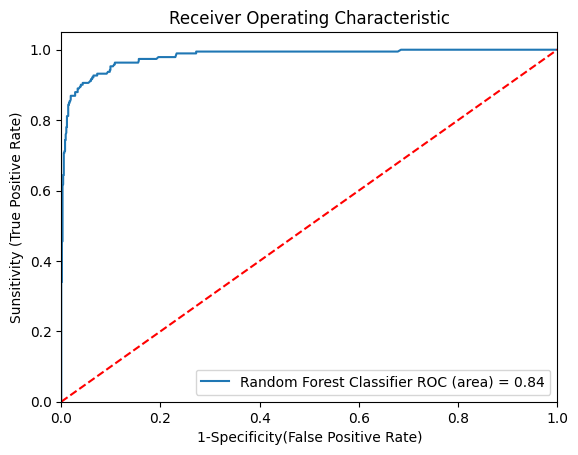

In [147]:
### Plot ROC AUC Curve

from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

## Add models to the list that you want to view on the ROC plot 

auc_model = [
    {
        'label':'Random Forest Classifier',
        'model':RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None),
        'score':0.8450
    }
]

## Create a loop through all models
for algo in auc_model:
    model = algo['model']
    model.fit(X_train,y_train)

    ## Compute false positive rate, true positive rate
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])

    ## Calculate Area under curve to display on the plot
    plt.plot(fpr,tpr,label='%s ROC (area) = %0.2f' % (algo['label'],algo['score']))
    ## Custom setting for plot
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("1-Specificity(False Positive Rate)")
    plt.ylabel("Sunsitivity (True Positive Rate)")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()